## Data Dictionary

## Import Libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from feature_engine.outliers import Winsorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset Telco_customer_churn
df=pd.read_excel(r'C:\\Users\\delll\\Desktop\\Python\\DataSets\\Telco_customer_churn.xlsx')
df.head()

Customer ID  Count Quarter Referred a Friend  Number of Referrals  \
0  8779-QRDMV      1      Q3                No                    0   
1  7495-OOKFY      1      Q3               Yes                    1   
2  1658-BYGOY      1      Q3                No                    0   
3  4598-XLKNJ      1      Q3               Yes                    1   
4  4846-WHAFZ      1      Q3               Yes                    1   

   Tenure in Months    Offer Phone Service  Avg Monthly Long Distance Charges  \
0                 1     None            No                               0.00   
1                 8  Offer E           Yes                              48.85   
2                18  Offer D           Yes                              11.33   
3                25  Offer C           Yes                              19.76   
4                37  Offer C           Yes                               6.33   

  Multiple Lines  ... Unlimited Data        Contract  Paperless Billing  \
0             No  ...             No  Month-to-Month                Yes   
1            Yes  ...            Yes  Month-to-Month                Yes   
2            Yes  ...            Yes  Month-to-Month                Yes   
3             No  ...            Yes  Month-to-Month                Yes   
4            Yes  ...            Yes  Month-to-Month                Yes   

    Payment Method Monthly Charge Total Charges Total Refunds  \
0  Bank Withdrawal          39.65         39.65          0.00   
1      Credit Card          80.65        633.30          0.00   
2  Bank Withdrawal          95.45       1752.55         45.61   
3  Bank Withdrawal          98.50       2514.50         13.43   
4  Bank Withdrawal          76.50       2868.15          0.00   

  Total Extra Data Charges Total Long Distance Charges Total Revenue  
0                       20                        0.00         59.65  
1                        0                      390.80       1024.10  
2                        0                      203.94       1910.88  
3                        0                      494.00       2995.07  
4                        0                      234.21       3102.36  

[5 rows x 30 columns]

In [3]:
df.shape

(7043, 30)

In [4]:
df.columns

Index(['Customer ID', 'Count', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Quarter                            7043 non-null   object 
 3   Referred a Friend                  7043 non-null   object 
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              7043 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      7043 non-null   objec

In [6]:
df.isnull().sum()
#There are no null values

Customer ID                          0
Count                                0
Quarter                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges            

In [7]:
df.describe()

Count  Number of Referrals  Tenure in Months  \
count  7043.0          7043.000000       7043.000000   
mean      1.0             1.951867         32.386767   
std       0.0             3.001199         24.542061   
min       1.0             0.000000          1.000000   
25%       1.0             0.000000          9.000000   
50%       1.0             0.000000         29.000000   
75%       1.0             3.000000         55.000000   
max       1.0            11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        7043.000000              7043.000000   
mean                           22.958954                20.515405   
std                            15.448113                20.418940   
min                             0.000000                 0.000000   
25%                             9.210000                 3.000000   
50%                            22.890000                17.000000   
75%                            36.395000                27.000000   
max                            49.990000                85.000000   

       Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
count     7043.000000    7043.000000    7043.000000               7043.000000   
mean        64.761692    2280.381264       1.962182                  6.860713   
std         30.090047    2266.220462       7.902614                 25.104978   
min         18.250000      18.800000       0.000000                  0.000000   
25%         35.500000     400.150000       0.000000                  0.000000   
50%         70.350000    1394.550000       0.000000                  0.000000   
75%         89.850000    3786.600000       0.000000                  0.000000   
max        118.750000    8684.800000      49.790000                150.000000   

       Total Long Distance Charges  Total Revenue  
count                  7043.000000    7043.000000  
mean                    749.099262    3034.379056  
std                     846.660055    2865.204542  
min                       0.000000      21.360000  
25%                      70.545000     605.610000  
50%                     401.440000    2108.640000  
75%                    1191.100000    4801.145000  
max                    3564.720000   11979.340000

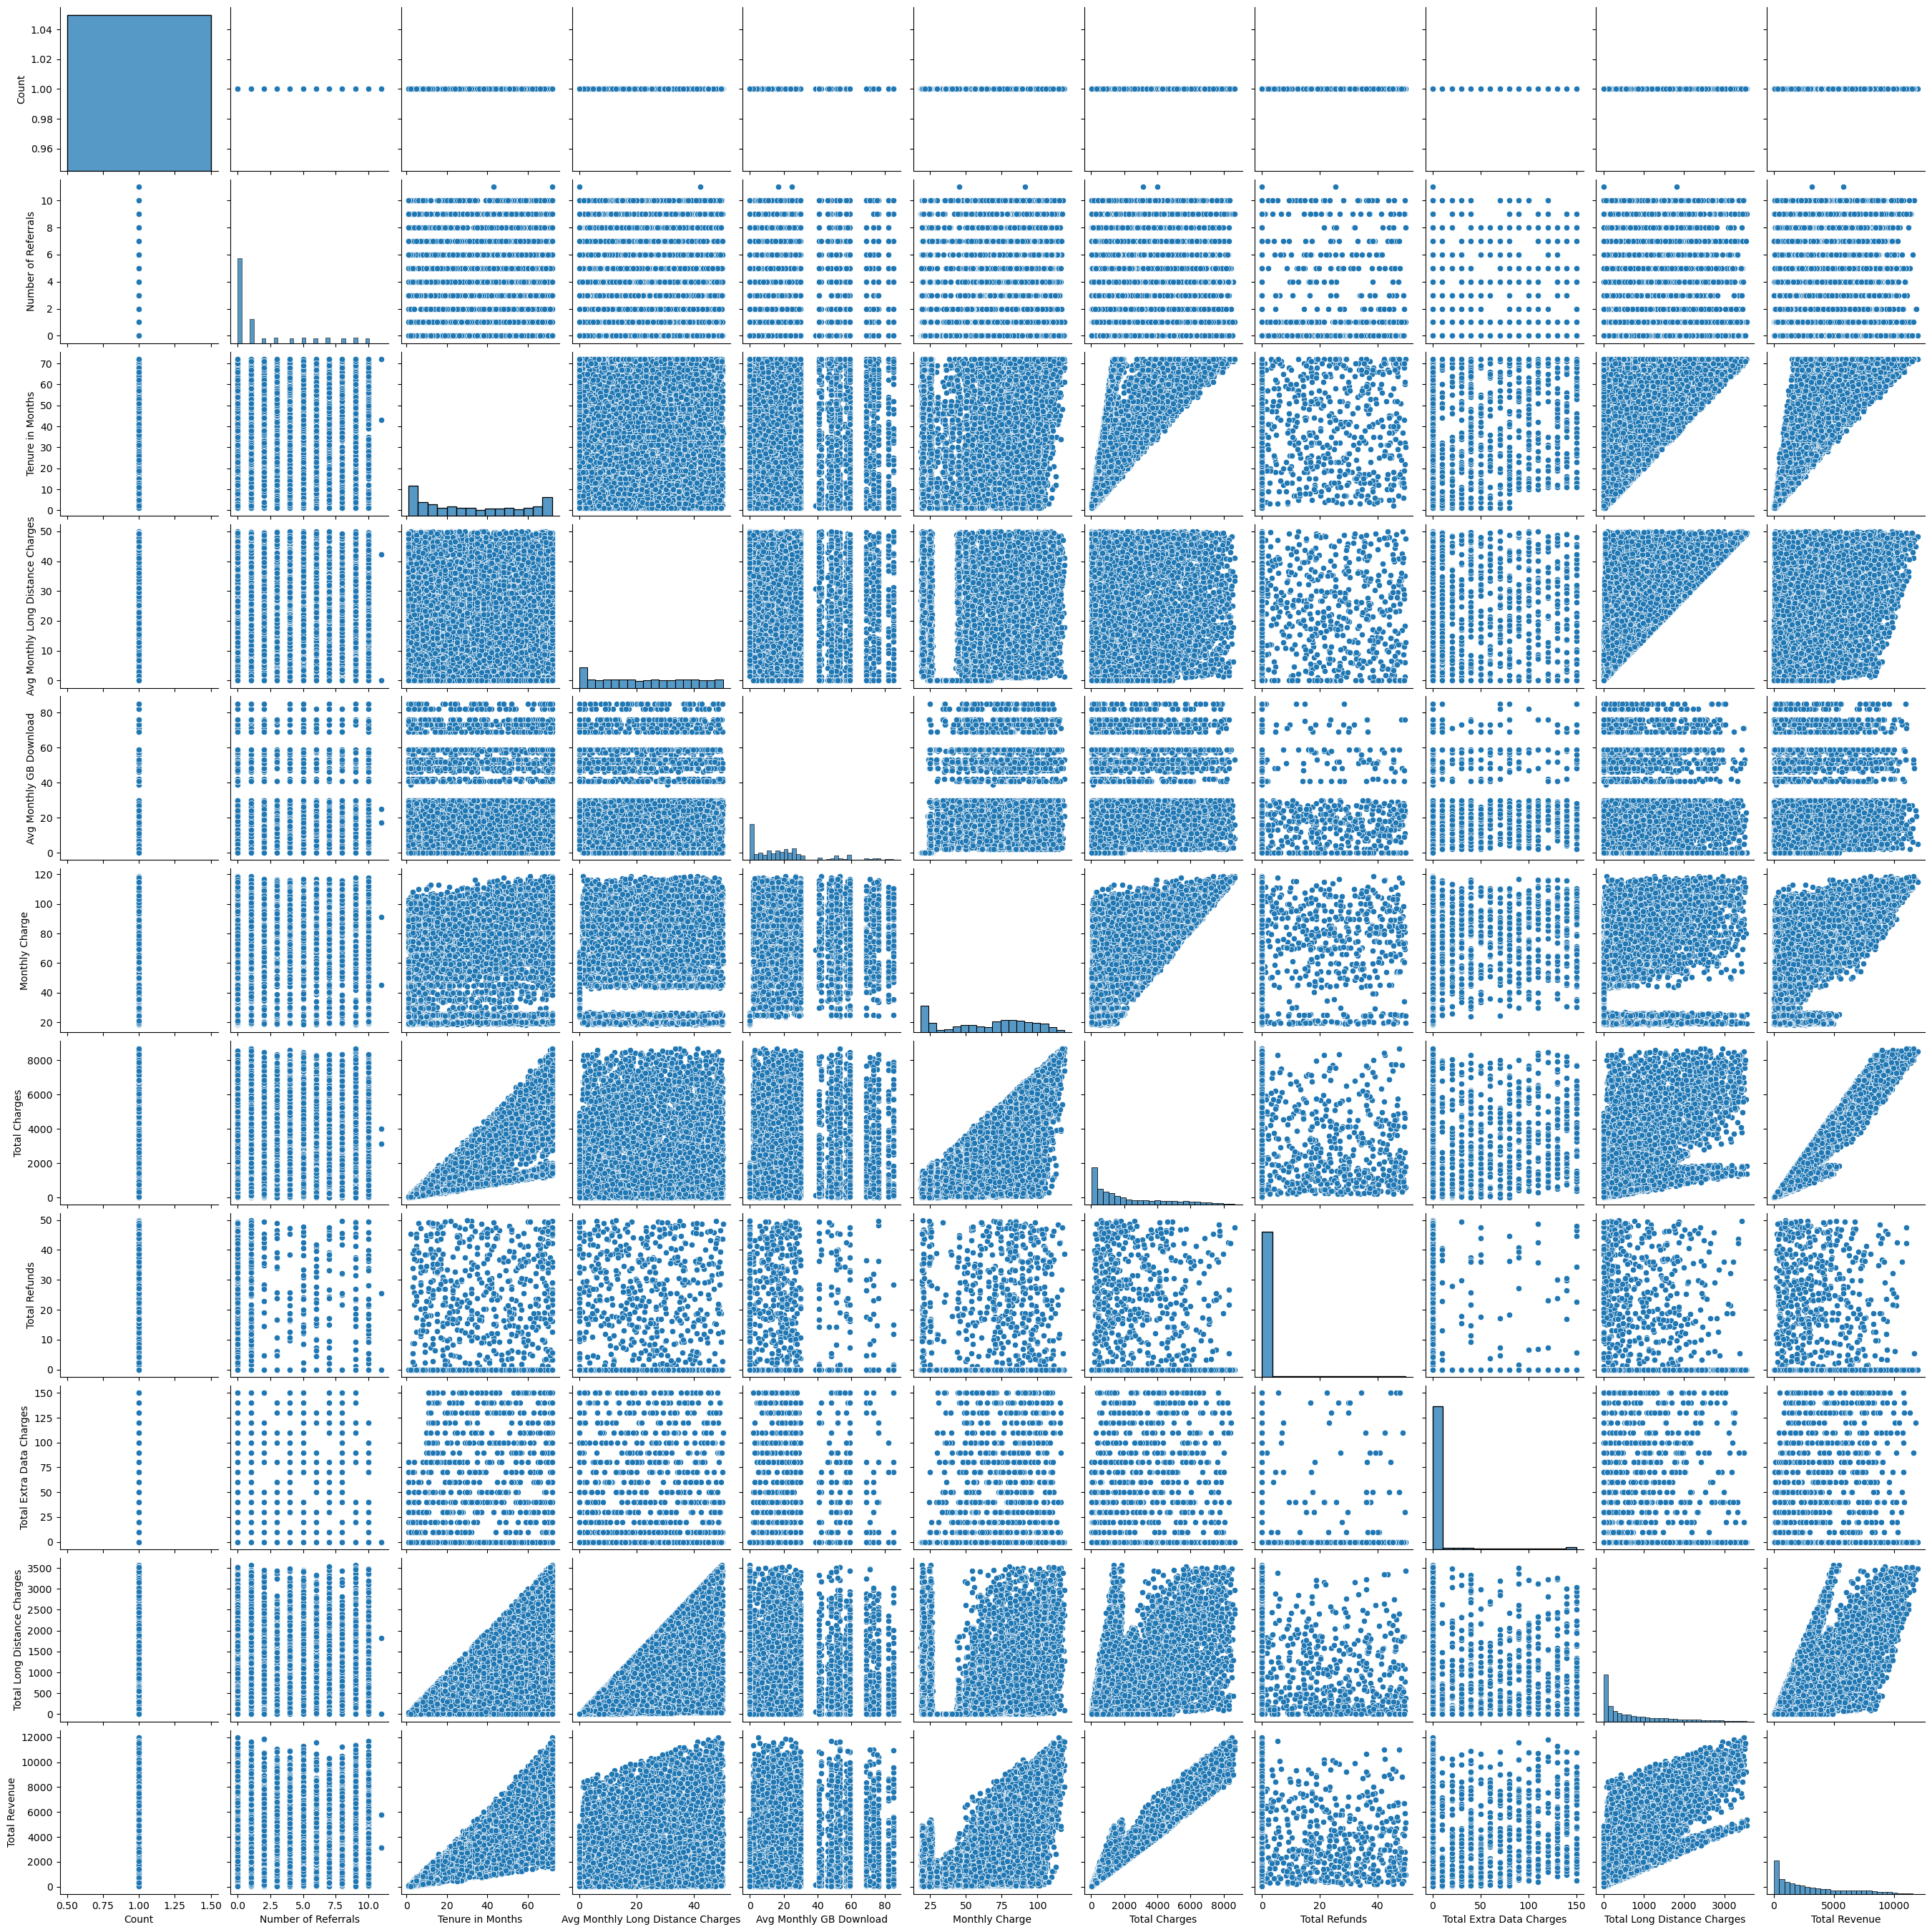

In [12]:
#Draw Pairplot and heatmap to find out the important features
sns.pairplot(df)
plt.show()

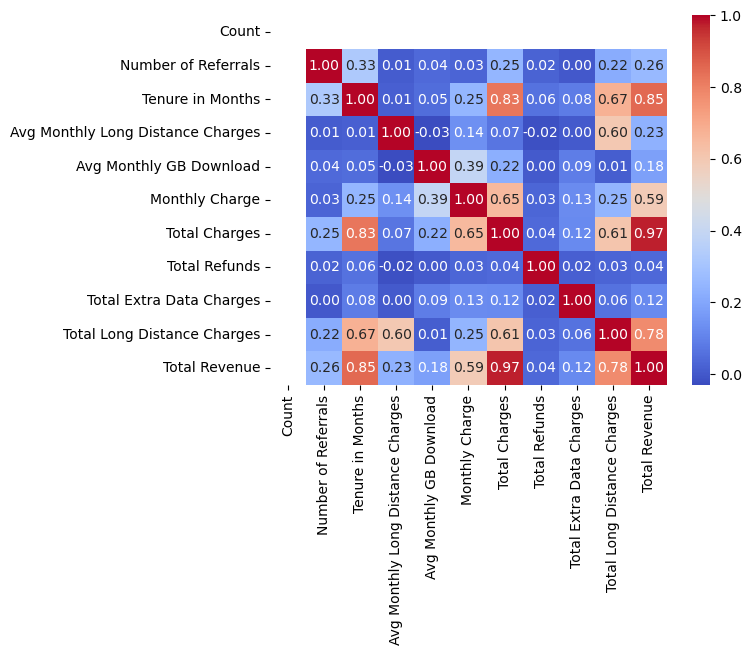

In [14]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,fmt='.2f')
plt.show()

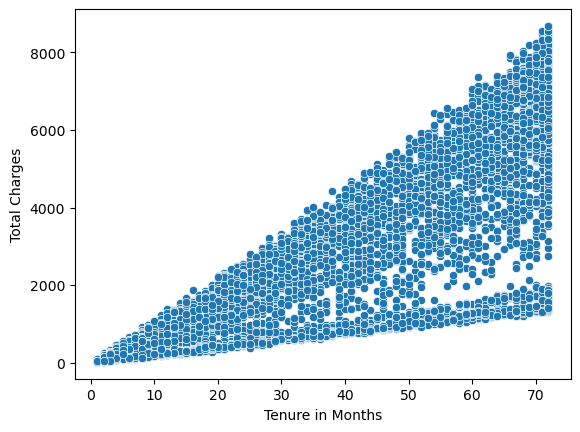

In [15]:
sns.scatterplot(x='Tenure in Months',y='Total Charges',data=df)
plt.show()

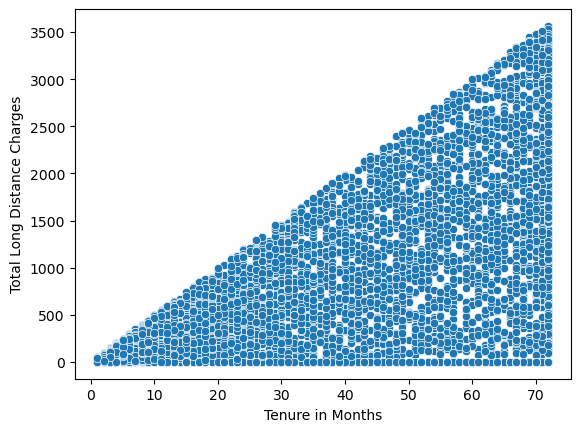

In [19]:
sns.scatterplot(x='Tenure in Months',y='Total Long Distance Charges',data=df)
plt.show()

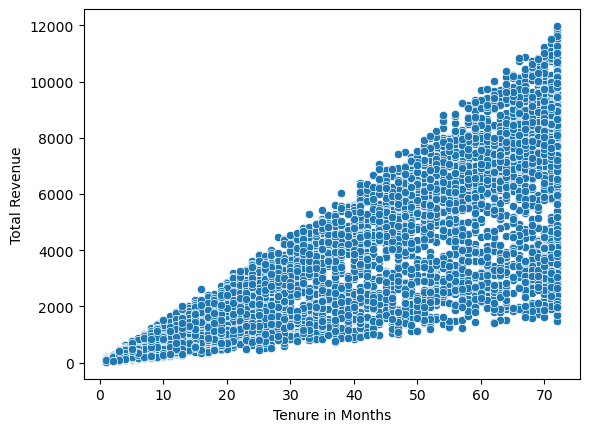

In [20]:
sns.scatterplot(x='Tenure in Months',y='Total Revenue',data=df)
plt.show()

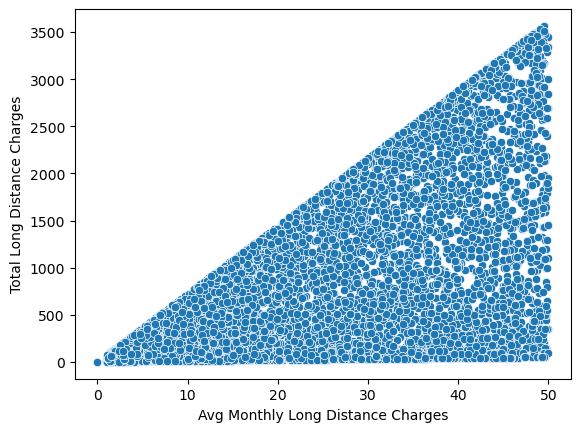

In [21]:
sns.scatterplot(x='Avg Monthly Long Distance Charges',y='Total Long Distance Charges',data=df)
plt.show()

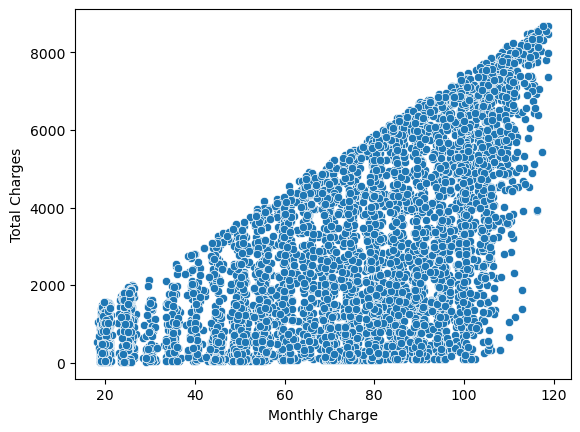

In [23]:
sns.scatterplot(x='Monthly Charge',y='Total Charges',data=df)
plt.show()

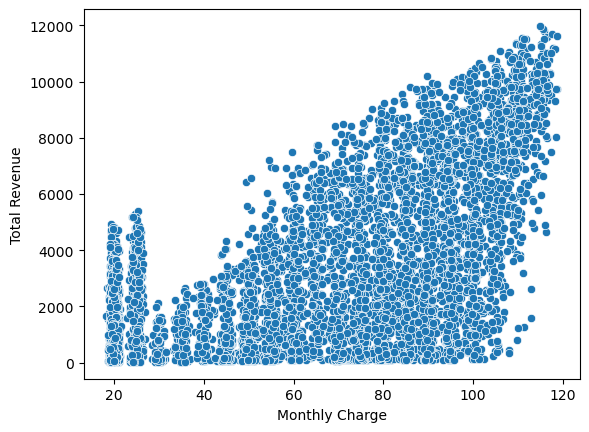

In [24]:
sns.scatterplot(x='Monthly Charge',y='Total Revenue',data=df)
plt.show()

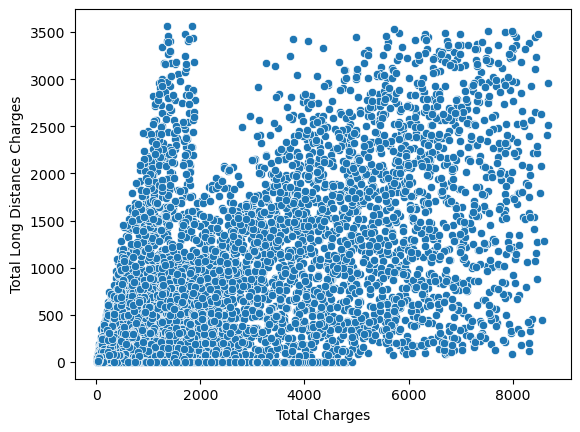

In [25]:
sns.scatterplot(x='Total Charges',y='Total Long Distance Charges',data=df)
plt.show()

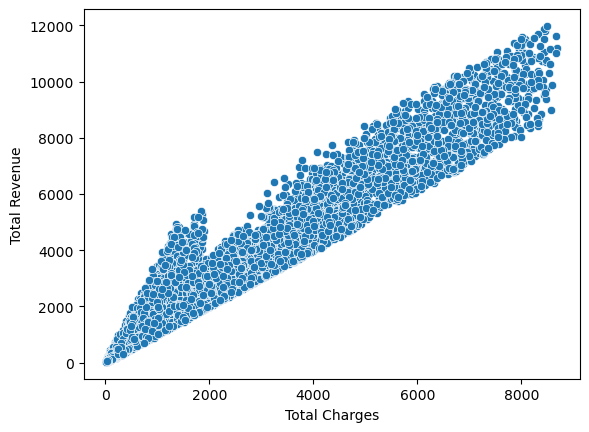

In [26]:
sns.scatterplot(x='Total Charges',y='Total Revenue',data=df)
plt.show()

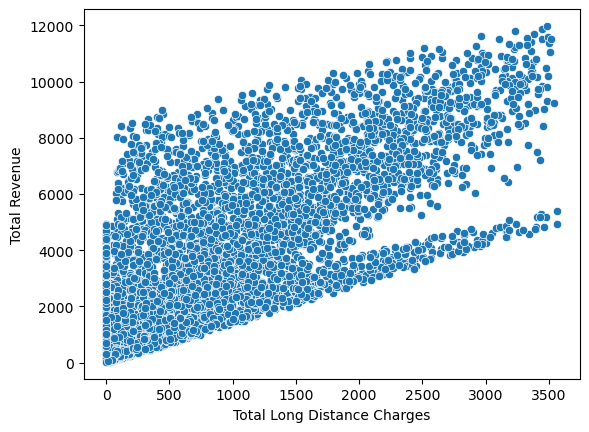

In [27]:
sns.scatterplot(x='Total Long Distance Charges',y='Total Revenue',data=df)
plt.show()

In [16]:
col=['Customer ID', 'Count', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Offer', 'Phone Service',
       'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method','Total Refunds',
       'Total Extra Data Charges']
df.drop(columns=col,inplace=True)

In [17]:
df.shape

(7043, 6)

In [18]:
df.head(10)

Tenure in Months  Avg Monthly Long Distance Charges  Monthly Charge  \
0                 1                               0.00           39.65   
1                 8                              48.85           80.65   
2                18                              11.33           95.45   
3                25                              19.76           98.50   
4                37                               6.33           76.50   
5                27                               3.33           78.05   
6                 1                              15.28           70.45   
7                58                               0.00           45.30   
8                15                              44.07           74.45   
9                 7                              26.95           76.45   

   Total Charges  Total Long Distance Charges  Total Revenue  
0          39.65                         0.00          59.65  
1         633.30                       390.80        1024.10  
2        1752.55                       203.94        1910.88  
3        2514.50                       494.00        2995.07  
4        2868.15                       234.21        3102.36  
5        2135.50                        89.91        2235.41  
6          70.45                        15.28          85.73  
7        2651.20                         0.00        2610.25  
8        1145.70                       661.05        1806.75  
9         503.60                       188.65         681.20

## draw Histogram

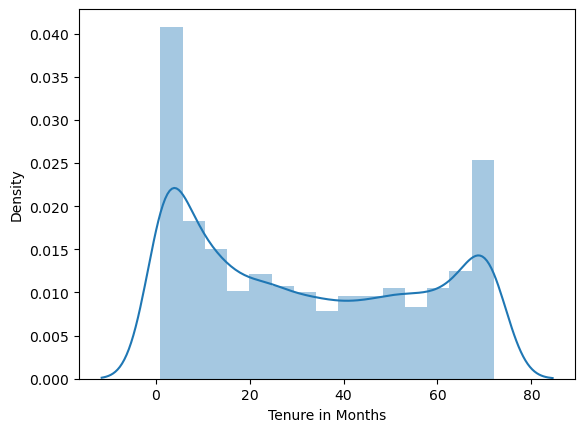

skewness: 0.24054261407486294
Kurtosis: -1.3870523608481071


In [29]:
sns.distplot(df['Tenure in Months'])
plt.show()
print("skewness:",df['Tenure in Months'].skew())
print("Kurtosis:",df['Tenure in Months'].kurtosis())
    

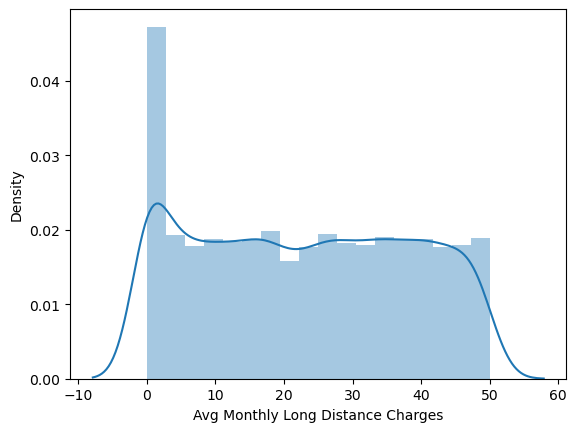

skewness: 0.049175899338412654
Kurtosis: -1.2546544102968529


In [31]:
sns.distplot(df['Avg Monthly Long Distance Charges'])
plt.show()
print("skewness:",df['Avg Monthly Long Distance Charges'].skew())
print("Kurtosis:",df['Avg Monthly Long Distance Charges'].kurtosis())   

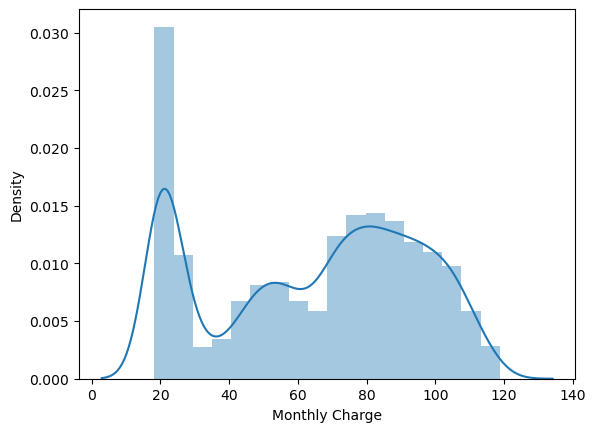

skewness: -0.22052443394398033
Kurtosis: -1.2572596945495058


In [51]:
sns.distplot(df['Monthly Charge'])
plt.show()
print("skewness:",df['Monthly Charge'].skew())
print("Kurtosis:",df['Monthly Charge'].kurtosis())
    

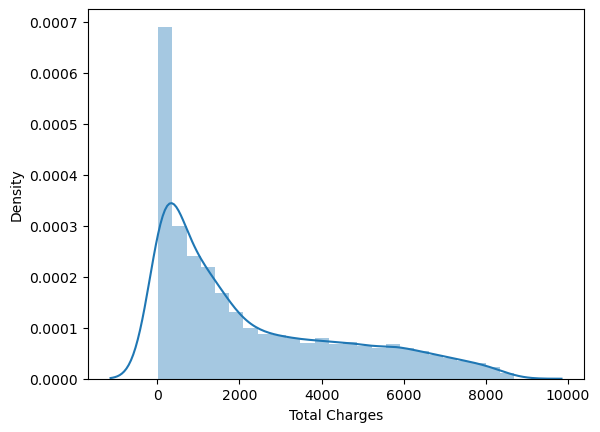

skewness: 0.9637910860571924
Kurtosis: -0.22769266470411198


In [33]:
sns.distplot(df['Total Charges'])
plt.show()
print("skewness:",df['Total Charges'].skew())
print("Kurtosis:",df['Total Charges'].kurtosis())
#data is right skewwed   

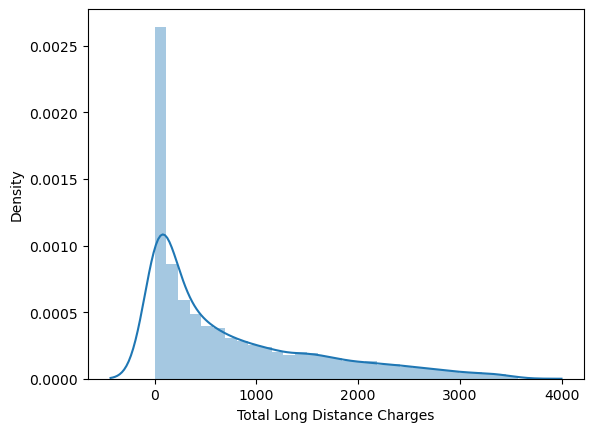

skewness: 1.2382819839547008
Kurtosis: 0.6440920769586533


In [34]:
sns.distplot(df['Total Long Distance Charges'])
plt.show()
print("skewness:",df['Total Long Distance Charges'].skew())
print("Kurtosis:",df['Total Long Distance Charges'].kurtosis())
#  data is right skewwed  

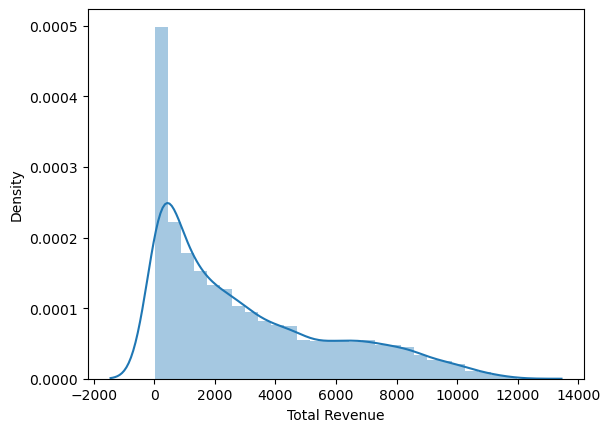

skewness: 0.9194102679721678
Kurtosis: -0.20345738968656235


In [35]:
sns.distplot(df['Total Revenue'])
plt.show()
print("skewness:",df['Total Revenue'].skew())
print("Kurtosis:",df['Total Revenue'].kurtosis())
#data is right skewwed   

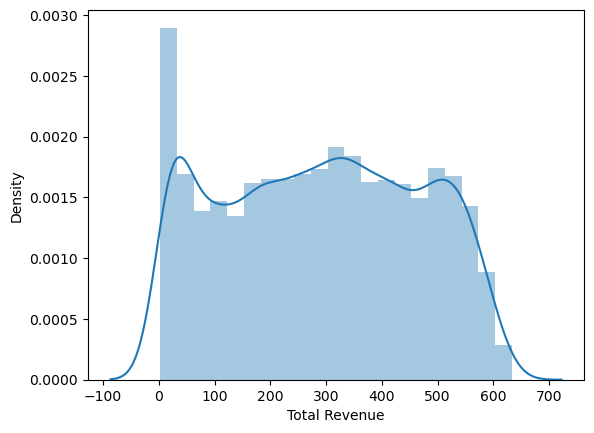

skewness: -0.0011603586201784273


In [47]:
#Make them normally distributed
df['Total Revenue']=np.square(df['Total Revenue'])
sns.distplot(df['Total Revenue'])
plt.show()
print("skewness:",df['Total Revenue'].skew())

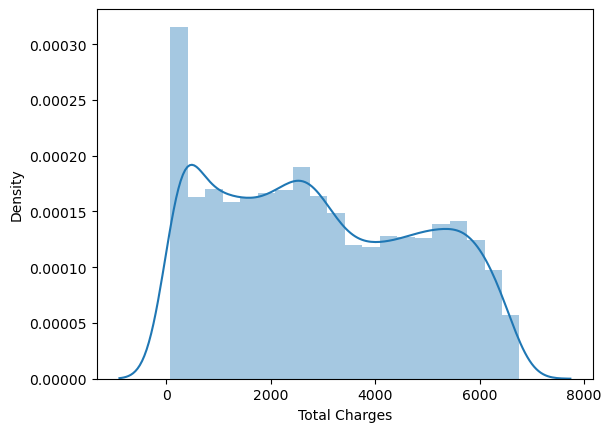

skewness: 0.2088957094387339


In [41]:
df['Total Charges']=np.square(df['Total Charges'])
sns.distplot(df['Total Charges'])
plt.show()
print("skewness:",df['Total Charges'].skew())

## draw boxplot

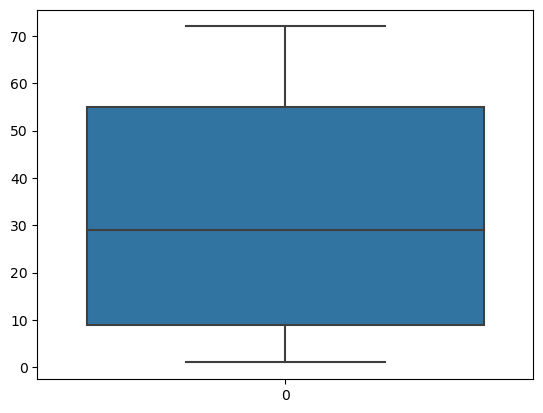

In [50]:
sns.boxplot(df['Tenure in Months'])
plt.show()

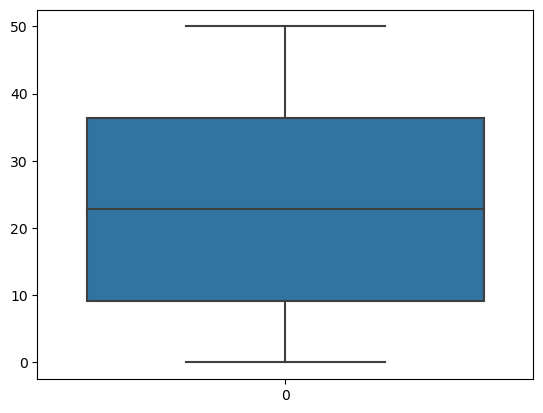

In [53]:
sns.boxplot(df['Avg Monthly Long Distance Charges'])
plt.show()

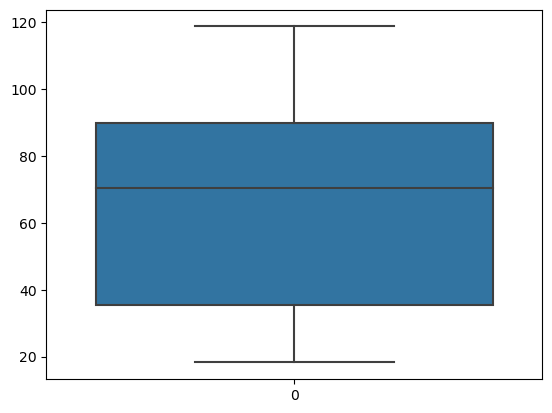

In [54]:
sns.boxplot(df['Monthly Charge'])
plt.show()

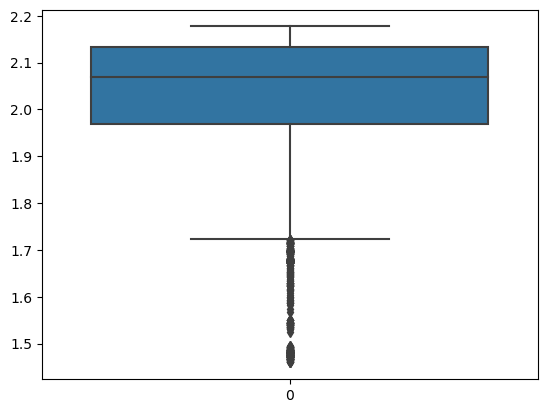

In [55]:
sns.boxplot(df['Total Charges'])
plt.show()
# it has outliers

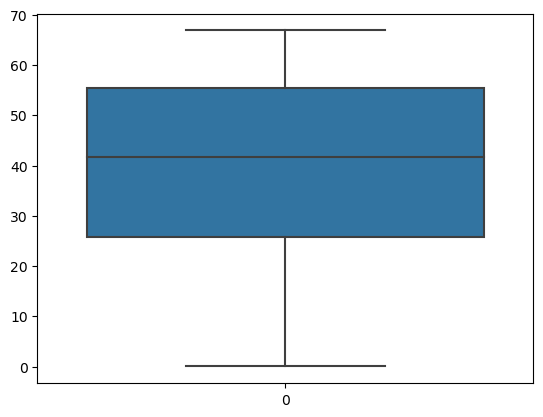

In [56]:
sns.boxplot(df['Total Long Distance Charges'])
plt.show()

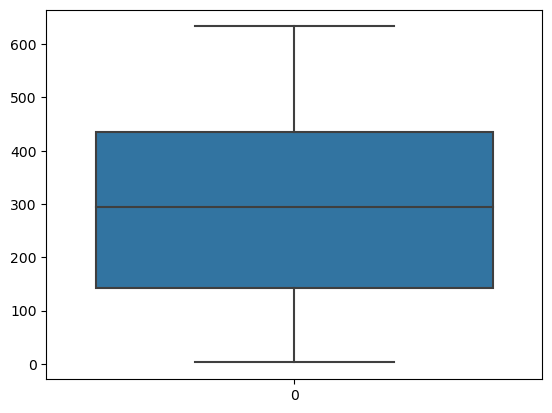

In [57]:
sns.boxplot(df['Total Revenue'])
plt.show()

<Axes: >

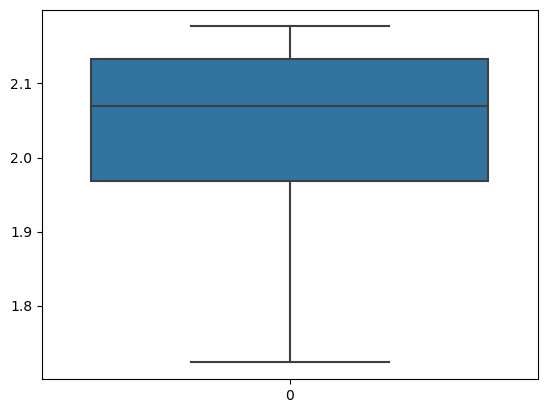

In [58]:
# Remove outliers
winsor=Winsorizer(capping_method='iqr',
                  tail='both',
                  fold=1.5,
                  variables=['Total Charges'])
df['Total Charges']=winsor.fit_transform(df[['Total Charges']])
sns.boxplot(df['Total Charges'])

In [59]:
def norm_fun(i):
    x=(i-i.min())/(i.max()-i.min())
    return x
df_norm=norm_fun(df)
b=df_norm.describe()

In [60]:
df_norm.head(10)

Tenure in Months  Avg Monthly Long Distance Charges  Monthly Charge  \
0          0.000000                           0.000000        0.212935   
1          0.098592                           0.977195        0.620896   
2          0.239437                           0.226645        0.768159   
3          0.338028                           0.395279        0.798507   
4          0.507042                           0.126625        0.579602   
5          0.366197                           0.066613        0.595025   
6          0.000000                           0.305661        0.519403   
7          0.802817                           0.000000        0.269154   
8          0.197183                           0.881576        0.559204   
9          0.084507                           0.539108        0.579104   

   Total Charges  Total Long Distance Charges  Total Revenue  
0       0.000000                          NaN       0.020616  
1       0.630189                          0.0       0.309071  
2       0.796890                          0.0       0.439490  
3       0.848018                          0.0       0.551573  
4       0.865791                          0.0       0.561015  
5       0.825325                          0.0       0.476842  
6       0.073576                          0.0       0.035278  
7       0.855221                          NaN       0.515613  
8       0.731726                          0.0       0.426600  
9       0.587017                          0.0       0.238751

In [61]:
df_norm.isnull().sum()

Tenure in Months                       0
Avg Monthly Long Distance Charges      0
Monthly Charge                         0
Total Charges                          0
Total Long Distance Charges          682
Total Revenue                          0
dtype: int64

In [62]:
df_norm.drop('Total Long Distance Charges',axis=1,inplace=True)


In [63]:
df_norm.head()

Tenure in Months  Avg Monthly Long Distance Charges  Monthly Charge  \
0          0.000000                           0.000000        0.212935   
1          0.098592                           0.977195        0.620896   
2          0.239437                           0.226645        0.768159   
3          0.338028                           0.395279        0.798507   
4          0.507042                           0.126625        0.579602   

   Total Charges  Total Revenue  
0       0.000000       0.020616  
1       0.630189       0.309071  
2       0.796890       0.439490  
3       0.848018       0.551573  
4       0.865791       0.561015

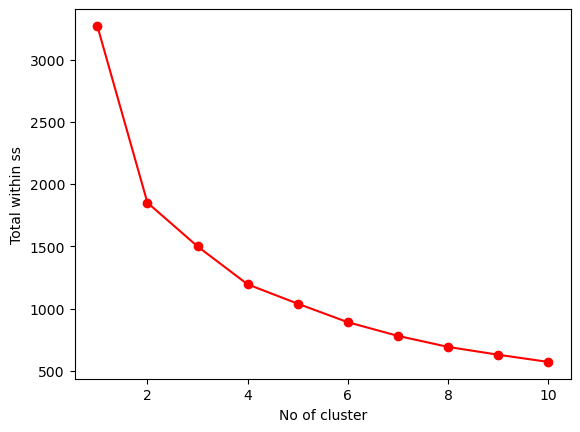

In [66]:
TWSS=[]
k=list(range(1,11))

for i in k:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    
    TWSS.append(kmeans.inertia_)
    
plt.plot(k,TWSS,'ro-')
plt.xlabel('No of cluster')
plt.ylabel('Total within ss')
plt.show()
#from elbow curve, number of clusters are 4

In [68]:
Model=KMeans(n_clusters=4)
Model.fit(df_norm)
Model.labels_
             

array([0, 1, 1, ..., 2, 0, 2])

In [69]:
KCluster=pd.Series(Model.labels_)
df_norm['KCluster']=KCluster

In [70]:
df_norm.head()

Tenure in Months  Avg Monthly Long Distance Charges  Monthly Charge  \
0          0.000000                           0.000000        0.212935   
1          0.098592                           0.977195        0.620896   
2          0.239437                           0.226645        0.768159   
3          0.338028                           0.395279        0.798507   
4          0.507042                           0.126625        0.579602   

   Total Charges  Total Revenue  KCluster  
0       0.000000       0.020616         0  
1       0.630189       0.309071         1  
2       0.796890       0.439490         1  
3       0.848018       0.551573         1  
4       0.865791       0.561015         3

In [71]:
df1=df_norm[df_norm['KCluster']==0]
df2=df_norm[df_norm['KCluster']==1]
df3=df_norm[df_norm['KCluster']==2]
df4=df_norm[df_norm['KCluster']==3]

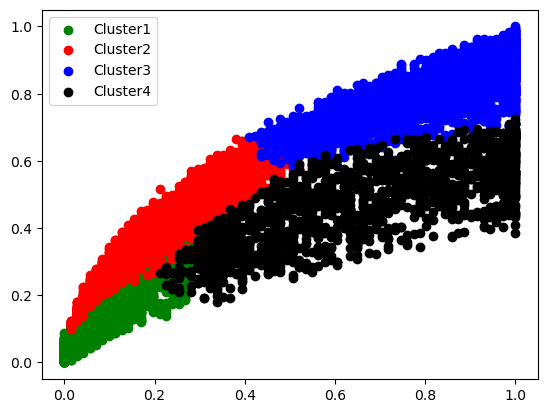

In [78]:
plt.scatter(df1['Tenure in Months'],df1['Total Revenue'],color='green',label='Cluster1')
plt.scatter(df2['Tenure in Months'],df2['Total Revenue'],color='red',label='Cluster2')
plt.scatter(df3['Tenure in Months'],df3['Total Revenue'],color='blue',label='Cluster3')
plt.scatter(df4['Tenure in Months'],df4['Total Revenue'],color='black',label='Cluster4')
plt.legend()
plt.show()

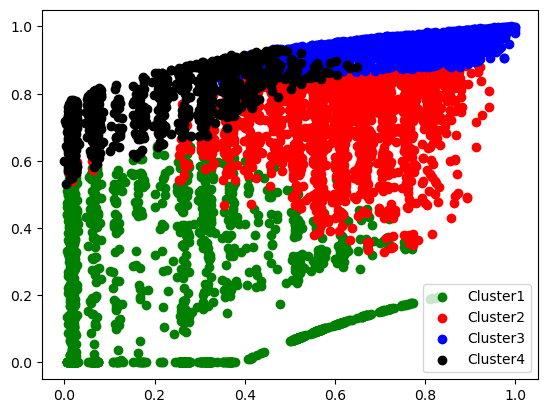

In [79]:
plt.scatter(df1['Monthly Charge'],df1['Total Charges'],color='green',label='Cluster1')
plt.scatter(df2['Monthly Charge'],df2['Total Charges'],color='red',label='Cluster2')
plt.scatter(df3['Monthly Charge'],df3['Total Charges'],color='blue',label='Cluster3')
plt.scatter(df4['Monthly Charge'],df4['Total Charges'],color='black',label='Cluster4')
plt.legend()
plt.show()